In [ ]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('applemobility.csv')
print(df)

            geo_type        region  ... 2021-11-23 2021-11-24
0     country/region       Albania  ...     146.16     143.96
1     country/region       Albania  ...     218.64     226.52
2     country/region     Argentina  ...      92.71      96.29
3     country/region     Argentina  ...      86.73      92.37
4     country/region     Australia  ...     121.05     124.84
...              ...           ...  ...        ...        ...
4686          county   York County  ...     212.27     255.52
4687          county  Young County  ...     209.01     207.59
4688          county   Yuba County  ...     163.42     181.13
4689          county   Yuma County  ...     171.67     217.98
4690          county   Yuma County  ...     196.31     211.85

[4691 rows x 688 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df['London']=df['region'].isin(['London'])
data=df[df['London']==True]
print(data)

    geo_type  region transportation_type  ... 2021-11-23 2021-11-24 London
541     city  London             driving  ...     125.10     124.96   True
542     city  London             transit  ...     149.68     152.75   True
543     city  London             walking  ...     135.18     140.07   True

[3 rows x 689 columns]


In [3]:
#data_T=pd.DataFrame(data.values.T,columns=index_row,index=index_columns)
data_T = data.T
print(data_T)
data_T.to_csv('data_T.csv')

                         541      542      543
geo_type                city     city     city
region                London   London   London
transportation_type  driving  transit  walking
alternative_name         NaN      NaN      NaN
sub-region           England  England  England
...                      ...      ...      ...
2021-11-21            118.71   156.43   133.93
2021-11-22            116.82   140.25   119.36
2021-11-23             125.1   149.68   135.18
2021-11-24            124.96   152.75   140.07
London                  True     True     True

[689 rows x 3 columns]


In [4]:
data_clean=data_T.drop(['geo_type','region','alternative_name','sub-region','country','transportation_type','London','2020-05-11','2020-05-12','2021-03-12'])

In [5]:
data2= data_clean.rename_axis('date').reset_index()
data2.columns = ['date','driving','transit','walking']
print(data2)

           date driving transit walking
0    2020-01-13     100     100     100
1    2020-01-14  107.65  105.14  108.89
2    2020-01-15   111.2  107.06  116.84
3    2020-01-16  108.29  106.08  118.82
4    2020-01-17  115.08  115.13  132.18
..          ...     ...     ...     ...
674  2021-11-20  153.15  204.72  228.99
675  2021-11-21  118.71  156.43  133.93
676  2021-11-22  116.82  140.25  119.36
677  2021-11-23   125.1  149.68  135.18
678  2021-11-24  124.96  152.75  140.07

[679 rows x 4 columns]


In [6]:
data2.to_csv('lodonmobility.csv')

In [ ]:
data2.date = pd.to_datetime(data2.date)

In [ ]:
data2[['year','month','day']] = data2.date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
print(data2)

          date  driving  transit  walking  ... walkingchange  year month day
0   2020-01-13   100.00   100.00   100.00  ...             0  2020    01  13
1   2020-01-14   107.65   105.14   108.89  ...          8.89  2020    01  14
2   2020-01-15   111.20   107.06   116.84  ...         16.84  2020    01  15
3   2020-01-16   108.29   106.08   118.82  ...         18.82  2020    01  16
4   2020-01-17   115.08   115.13   132.18  ...         32.18  2020    01  17
..         ...      ...      ...      ...  ...           ...   ...   ...  ..
674 2021-11-20   153.15   204.72   228.99  ...        128.99  2021    11  20
675 2021-11-21   118.71   156.43   133.93  ...         33.93  2021    11  21
676 2021-11-22   116.82   140.25   119.36  ...         19.36  2021    11  22
677 2021-11-23   125.10   149.68   135.18  ...         35.18  2021    11  23
678 2021-11-24   124.96   152.75   140.07  ...         40.07  2021    11  24

[679 rows x 10 columns]


In [ ]:
data2.to_csv('mobilityclean.csv')

In [ ]:
data2['driving']=pd.to_numeric(data2['driving'],errors='coerce')
data2['transit']=pd.to_numeric(data2['transit'],errors='coerce')
data2['walking']=pd.to_numeric(data2['walking'],errors='coerce')
data2.dtypes
result=data2[['date','driving','transit','walking','year','month','day']]
result['drivingchange']=result['driving']-100
result['transitchange']=result['transit']-100
print(result)

          date  driving  transit  ...  day drivingchange transitchange
0   2020-01-13   100.00   100.00  ...   13          0.00          0.00
1   2020-01-14   107.65   105.14  ...   14          7.65          5.14
2   2020-01-15   111.20   107.06  ...   15         11.20          7.06
3   2020-01-16   108.29   106.08  ...   16          8.29          6.08
4   2020-01-17   115.08   115.13  ...   17         15.08         15.13
..         ...      ...      ...  ...  ...           ...           ...
674 2021-11-20   153.15   204.72  ...   20         53.15        104.72
675 2021-11-21   118.71   156.43  ...   21         18.71         56.43
676 2021-11-22   116.82   140.25  ...   22         16.82         40.25
677 2021-11-23   125.10   149.68  ...   23         25.10         49.68
678 2021-11-24   124.96   152.75  ...   24         24.96         52.75

[679 rows x 9 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
result['year'] = result['year'].astype(str)
result['month'] = result['month'].astype(str)
result['month1'] = result['year'] + result['month']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
result3 = pd.DataFrame()
for i in months:
    result2 = result.loc[result['month1'] == i]['drivingchange']
    result2 = result2.reset_index()
    result2 = result2.drop('index',axis =1)
    result3 = pd.concat([result3,result2],axis = 1,ignore_index=True)
result3.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print(result3)

      Jan    Feb    Mar    Apr    May  ...    Aug    Sep    Oct    Nov  Dec
0    0.00  21.48   6.82 -69.50 -59.57  ...  15.03  24.87  39.32  17.67  NaN
1    7.65   3.99   3.19 -69.37 -62.02  ...  17.19  26.97  39.30  24.00  NaN
2   11.20   1.60   7.89 -67.45 -66.30  ...  18.56  38.64  21.96  26.01  NaN
3    8.29   5.72  11.68 -71.54 -59.99  ...  29.75  41.17  25.31  25.15  NaN
4   15.08  10.51  12.97 -74.30 -58.16  ...  24.28  27.58  22.02  42.11  NaN
5   22.20  10.47  22.13 -68.98 -57.07  ...  40.92  23.31  23.18  45.89  NaN
6    1.06  15.70  25.74 -67.91 -56.44  ...  31.28  27.88  23.74  15.54  NaN
7    5.14  23.02  -0.49 -67.40 -59.48  ...  14.21  30.94  35.90  14.03  NaN
8   12.18  -3.21  -0.43 -66.63 -59.47  ...  21.66  28.84  47.74  19.70  NaN
9   14.32   7.55   1.66 -70.16 -63.24  ...  24.89  45.65  19.84  26.73  NaN
10  11.18   9.80   0.34 -71.86 -51.04  ...  25.81  51.45  17.12  27.64  NaN
11  18.01  10.74  -5.05 -77.46 -49.59  ...  25.69  26.09  25.64  47.96  NaN
12  24.14  1

In [ ]:
result5 = pd.DataFrame()
for i in months:
    result4 = result.loc[result['month1'] == i]['transitchange']
    result4 = result4.reset_index()
    result4 = result4.drop('index',axis =1)
    result5 = pd.concat([result5,result4],axis = 1,ignore_index=True)
print(result5)

       0      1      2      3      4   ...     19      20      21      22  23
0    0.00  29.92   9.14 -86.34 -84.38  ...  26.80   42.74   75.71   44.91 NaN
1    5.14  11.18   2.74 -86.35 -84.06  ...  26.75   47.76   85.80   47.62 NaN
2    7.06   4.18   5.44 -86.64 -83.79  ...  29.47   57.11   62.96   51.04 NaN
3    6.08   7.19   6.93 -87.49 -82.62  ...  36.40   69.35   46.10   50.75 NaN
4   15.13  11.08   6.97 -87.17 -82.43  ...  29.80   56.77   46.93   76.54 NaN
5   26.63  11.71  18.77 -86.35 -82.51  ...  41.17   49.63   51.46   93.25 NaN
6    4.37  20.48  27.78 -86.64 -82.33  ...  45.25   49.51   52.66   49.57 NaN
7    3.68  34.34   0.86 -86.82 -82.22  ...  24.36   51.21   72.35   38.11 NaN
8    9.45   3.13  -1.95 -86.75 -81.55  ...  26.83   47.89   96.09   42.51 NaN
9   12.85   6.62  -0.53 -87.30 -82.08  ...  39.04   65.15   55.54   50.02 NaN
10  11.52   9.07  -5.67 -87.90 -80.05  ...  37.16   81.81   43.80   54.86 NaN
11  20.06  11.20 -13.72 -88.79 -80.27  ...  37.76   51.62   47.8

In [ ]:
driving=result.groupby(['year','month']).mean()['driving'].reset_index(name='driving_mean')
driving['drivingchange']=driving['driving_mean']-100
print(driving)

    year month  driving_mean  drivingchange
0   2020    01    110.277368      10.277368
1   2020    02    114.612414      14.612414
2   2020    03     73.293871     -26.706129
3   2020    04     32.839667     -67.160333
4   2020    05     53.840345     -46.159655
5   2020    06     76.460333     -23.539667
6   2020    07     98.159355      -1.840645
7   2020    08    109.366774       9.366774
8   2020    09    112.188333      12.188333
9   2020    10    100.069355       0.069355
10  2020    11     74.203000     -25.797000
11  2020    12     75.260645     -24.739355
12  2021    01     56.140645     -43.859355
13  2021    02     66.054643     -33.945357
14  2021    03     77.318333     -22.681667
15  2021    04     94.912000      -5.088000
16  2021    05    106.783226       6.783226
17  2021    06    120.001000      20.001000
18  2021    07    122.004839      22.004839
19  2021    08    127.082581      27.082581
20  2021    09    134.221333      34.221333
21  2021    10    130.740645    

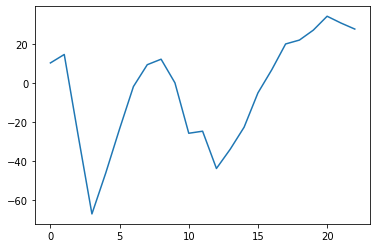

In [ ]:
driving['drivingchange'].plot()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


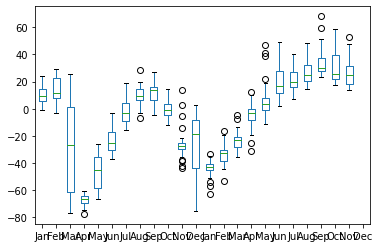

In [ ]:
box=result3.plot.box()

In [ ]:
transit=result.groupby(['year','month']).mean()['transit'].reset_index(name='transit_mean')
transit['transitchange']=transit['transit_mean']-100
print(transit)

    year month  transit_mean  transitchange
0   2020    01    111.261579      11.261579
1   2020    02    117.755172      17.755172
2   2020    03     61.980645     -38.019355
3   2020    04     13.730000     -86.270000
4   2020    05     22.614483     -77.385517
5   2020    06     36.774333     -63.225667
6   2020    07     57.334194     -42.665806
7   2020    08     73.232258     -26.767742
8   2020    09     82.161667     -17.838333
9   2020    10     75.266452     -24.733548
10  2020    11     49.636000     -50.364000
11  2020    12     53.955161     -46.044839
12  2021    01     34.270645     -65.729355
13  2021    02     41.405714     -58.594286
14  2021    03     54.194667     -45.805333
15  2021    04     77.704333     -22.295667
16  2021    05     96.825484      -3.174516
17  2021    06    118.652333      18.652333
18  2021    07    129.160645      29.160645
19  2021    08    139.558387      39.558387
20  2021    09    158.925333      58.925333
21  2021    10    164.320323    

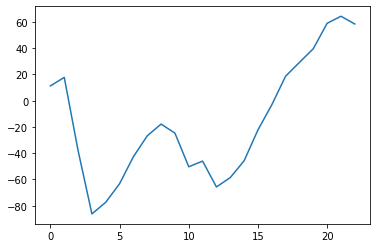

In [ ]:
transit['transitchange'].plot()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


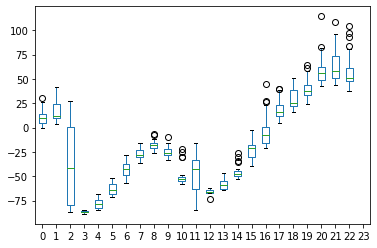

In [ ]:
result5.plot.box()